In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('temp.csv')
pd.set_option('display.max_columns', None)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.shape

(7752, 25)

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

We have almost all the data in numerical format except date which is in object which we will split later.

In [6]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

As we see here that the latitude and longitude are almost similar, it looks like that the location from where the data is taken is pretty much same.

In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We see here that we have few null values here in the data, which we will treat.

Dealing with dates to change them.

In [9]:
df['Date'] = pd.to_datetime(df.Date)

In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

Removing the date columns now.

In [11]:
df.drop('Date', inplace = True, axis = 1)

In [13]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.0,8.0,30.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.0,8.0,30.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


Let us work with the null values now.

<AxesSubplot:>

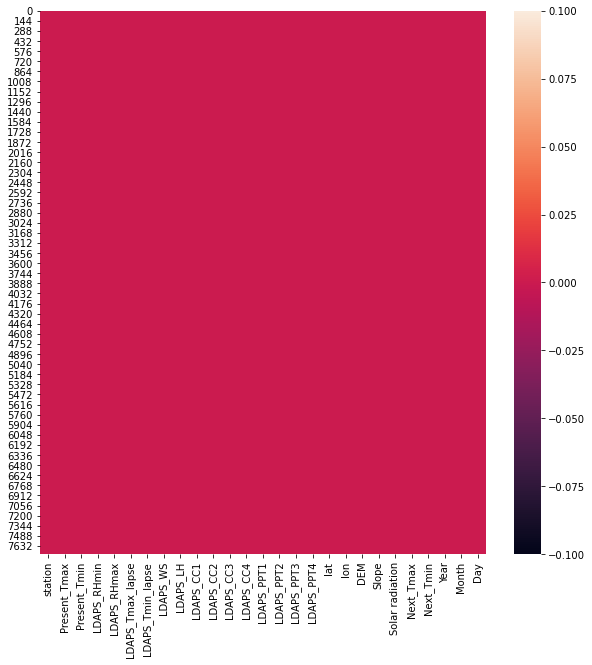

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())

We see here that the null values are spread across and hence it will be better to impute the data.

In [16]:
df_imp_col = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day']

In [17]:
from sklearn.impute import KNNImputer

In [18]:
knni = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [19]:
df = knni.fit_transform(df)

In [20]:
df = pd.DataFrame(df, columns = df_imp_col)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [21]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

All the na values are removed after imputing using KNN.

In [24]:
ldaps_test = ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
for i in ldaps_test:
    print(df[i].value_counts())
    print('\n')

0.000000    4871
0.001953      11
0.002604       5
0.253744       3
0.001734       3
            ... 
0.022148       1
0.381560       1
0.005491       1
3.473907       1
0.038950       1
Name: LDAPS_PPT1, Length: 2855, dtype: int64


0.000000     5174
0.001953        7
0.000040        3
0.000781        3
0.010005        3
             ... 
2.033675        1
13.845014       1
0.030639        1
0.289520        1
0.000575        1
Name: LDAPS_PPT2, Length: 2558, dtype: int64


0.000000    5318
0.001953      10
0.000852       4
0.002604       3
0.027203       3
            ... 
0.116929       1
0.052301       1
0.002103       1
0.030672       1
0.000350       1
Name: LDAPS_PPT3, Length: 2402, dtype: int64


0.000000    5799
0.000290       4
0.001953       3
0.000710       2
0.000508       2
            ... 
0.517369       1
0.562611       1
0.016550       1
3.008058       1
0.008702       1
Name: LDAPS_PPT4, Length: 1938, dtype: int64




    
    We have a lot of 0 values in the ldaps whcih is mentioned above.
    
    We can remove the column being it to be 0, but as it descibes the possibility of rain, the very next day, 0 makes sense as it means no rain.

Checking correlation to get better details here.

<AxesSubplot:>

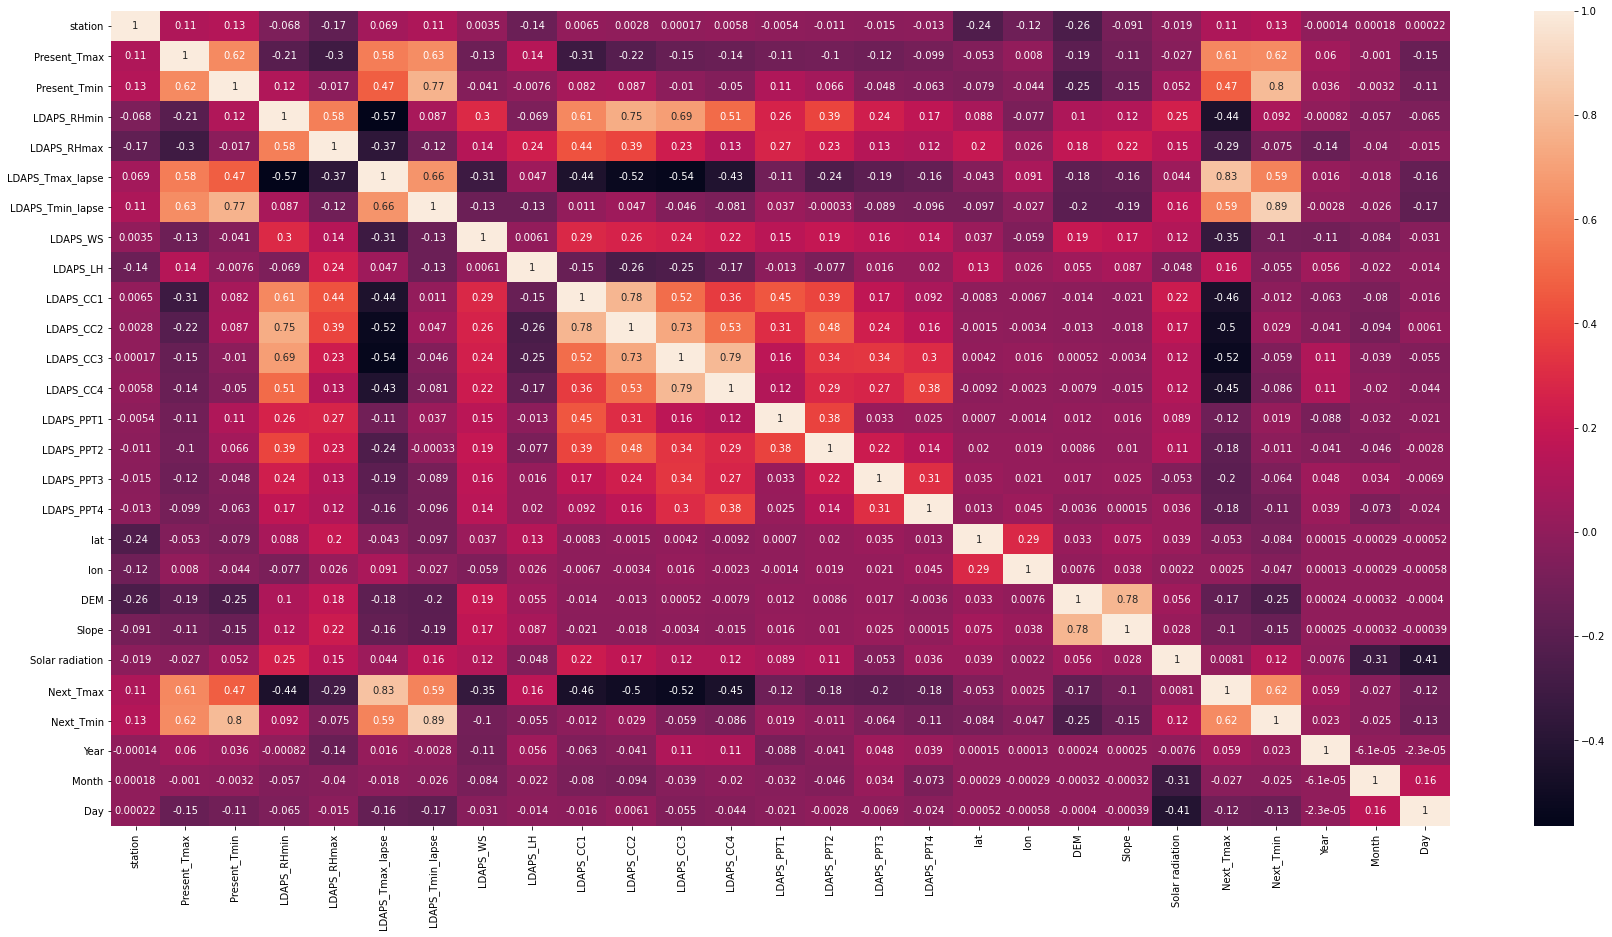

In [33]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(), annot=True)

We see here that Ldaps H and ldaps cc1 is having high correlation.

similary cc1 to cc2, cc2 to cc3 and cc3 to cc4.

Also there is a good relation between Present Tmin and present tmax

Next tmax is negatively correlated with all the ldaps.

Dem and slope is also highly correlated.

Both the output variables are correlated with each other.

present tmax and min are highly correlated with the output variables.

Visualisation.


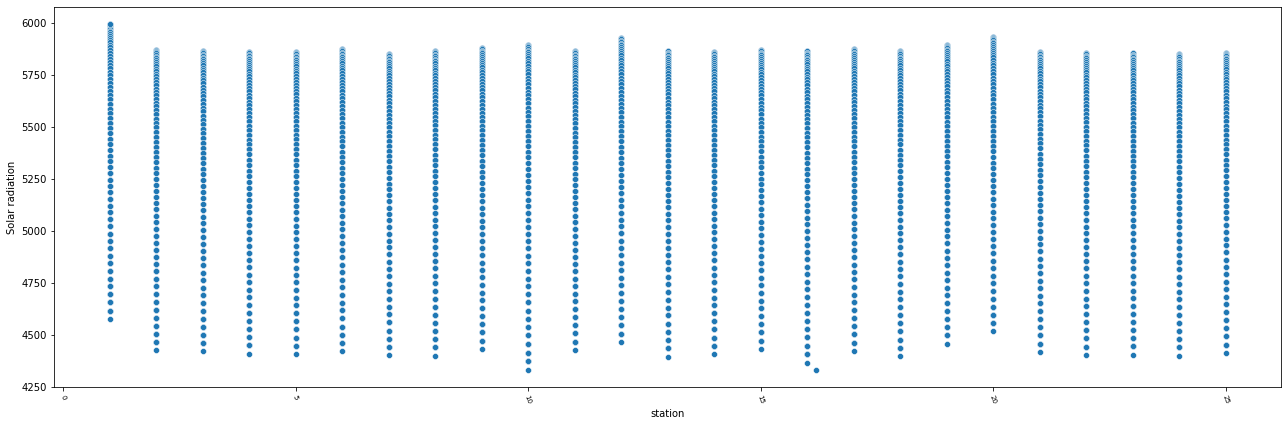

In [41]:
plt.figure(figsize = (22,7))
sns.scatterplot(y="Solar radiation", x="station", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

Solar radiation in the station is almost pretty much same excpect few like 1, 13, 20.

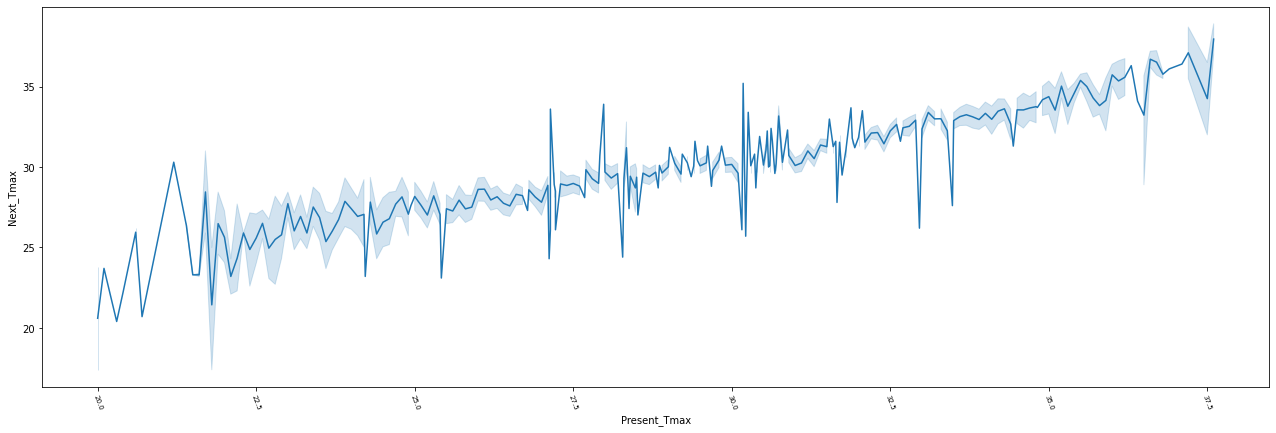

In [42]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmax", x="Present_Tmax", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

We see here the same thing as we saw in the correlation plot as well, with the increase in Present Tmax, the Next tmax also increases.

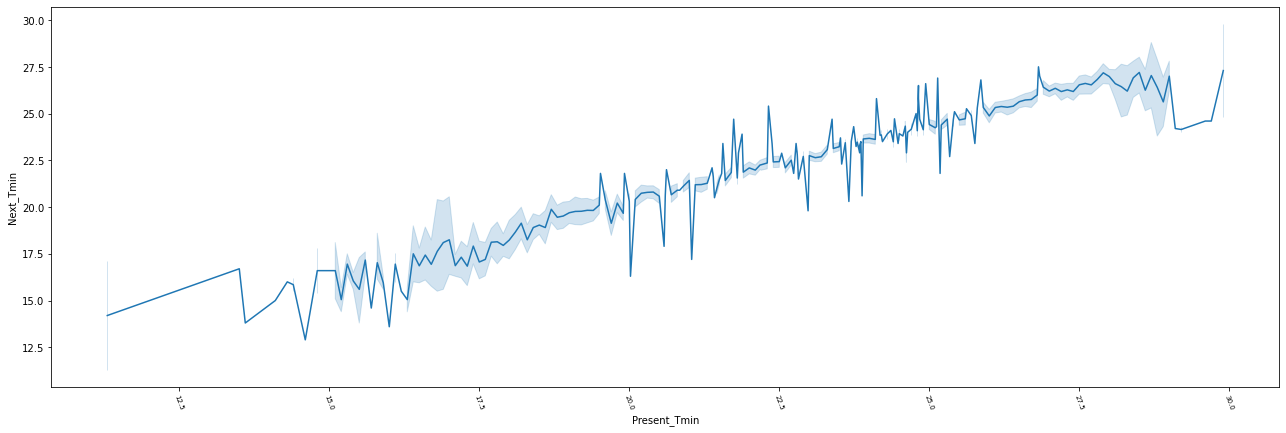

In [43]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmin", x="Present_Tmin", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

With the increase in tmin, next min also increases.

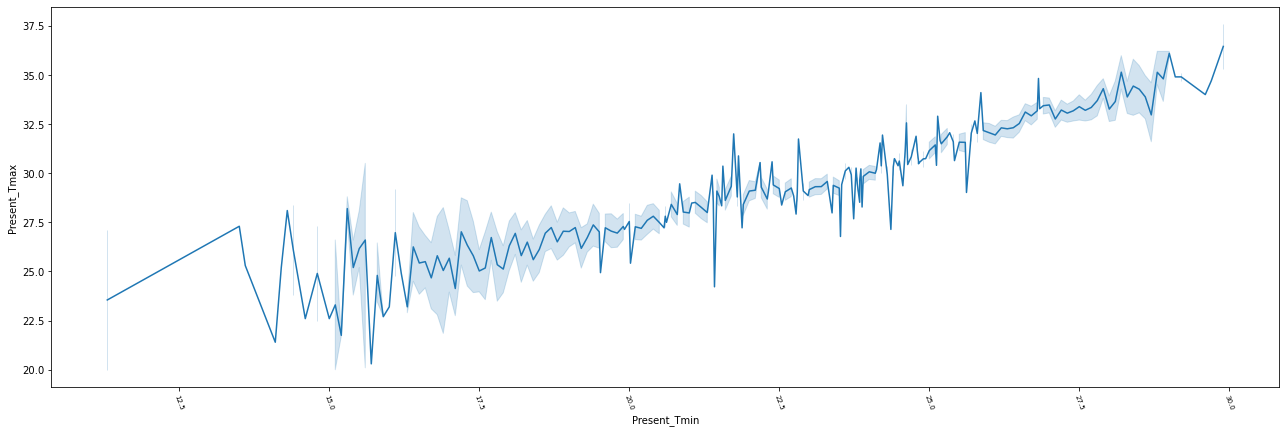

In [45]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Present_Tmax", x="Present_Tmin", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

Present tmin increases, present tmax also increases.

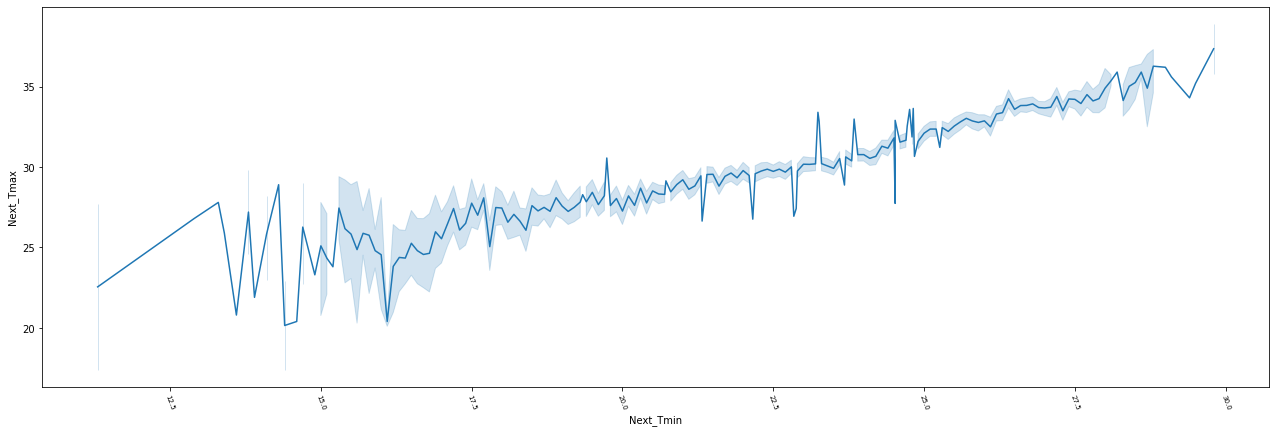

In [49]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmax", x="Next_Tmin", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

With the increase in next tmin, next tmax also increases. 

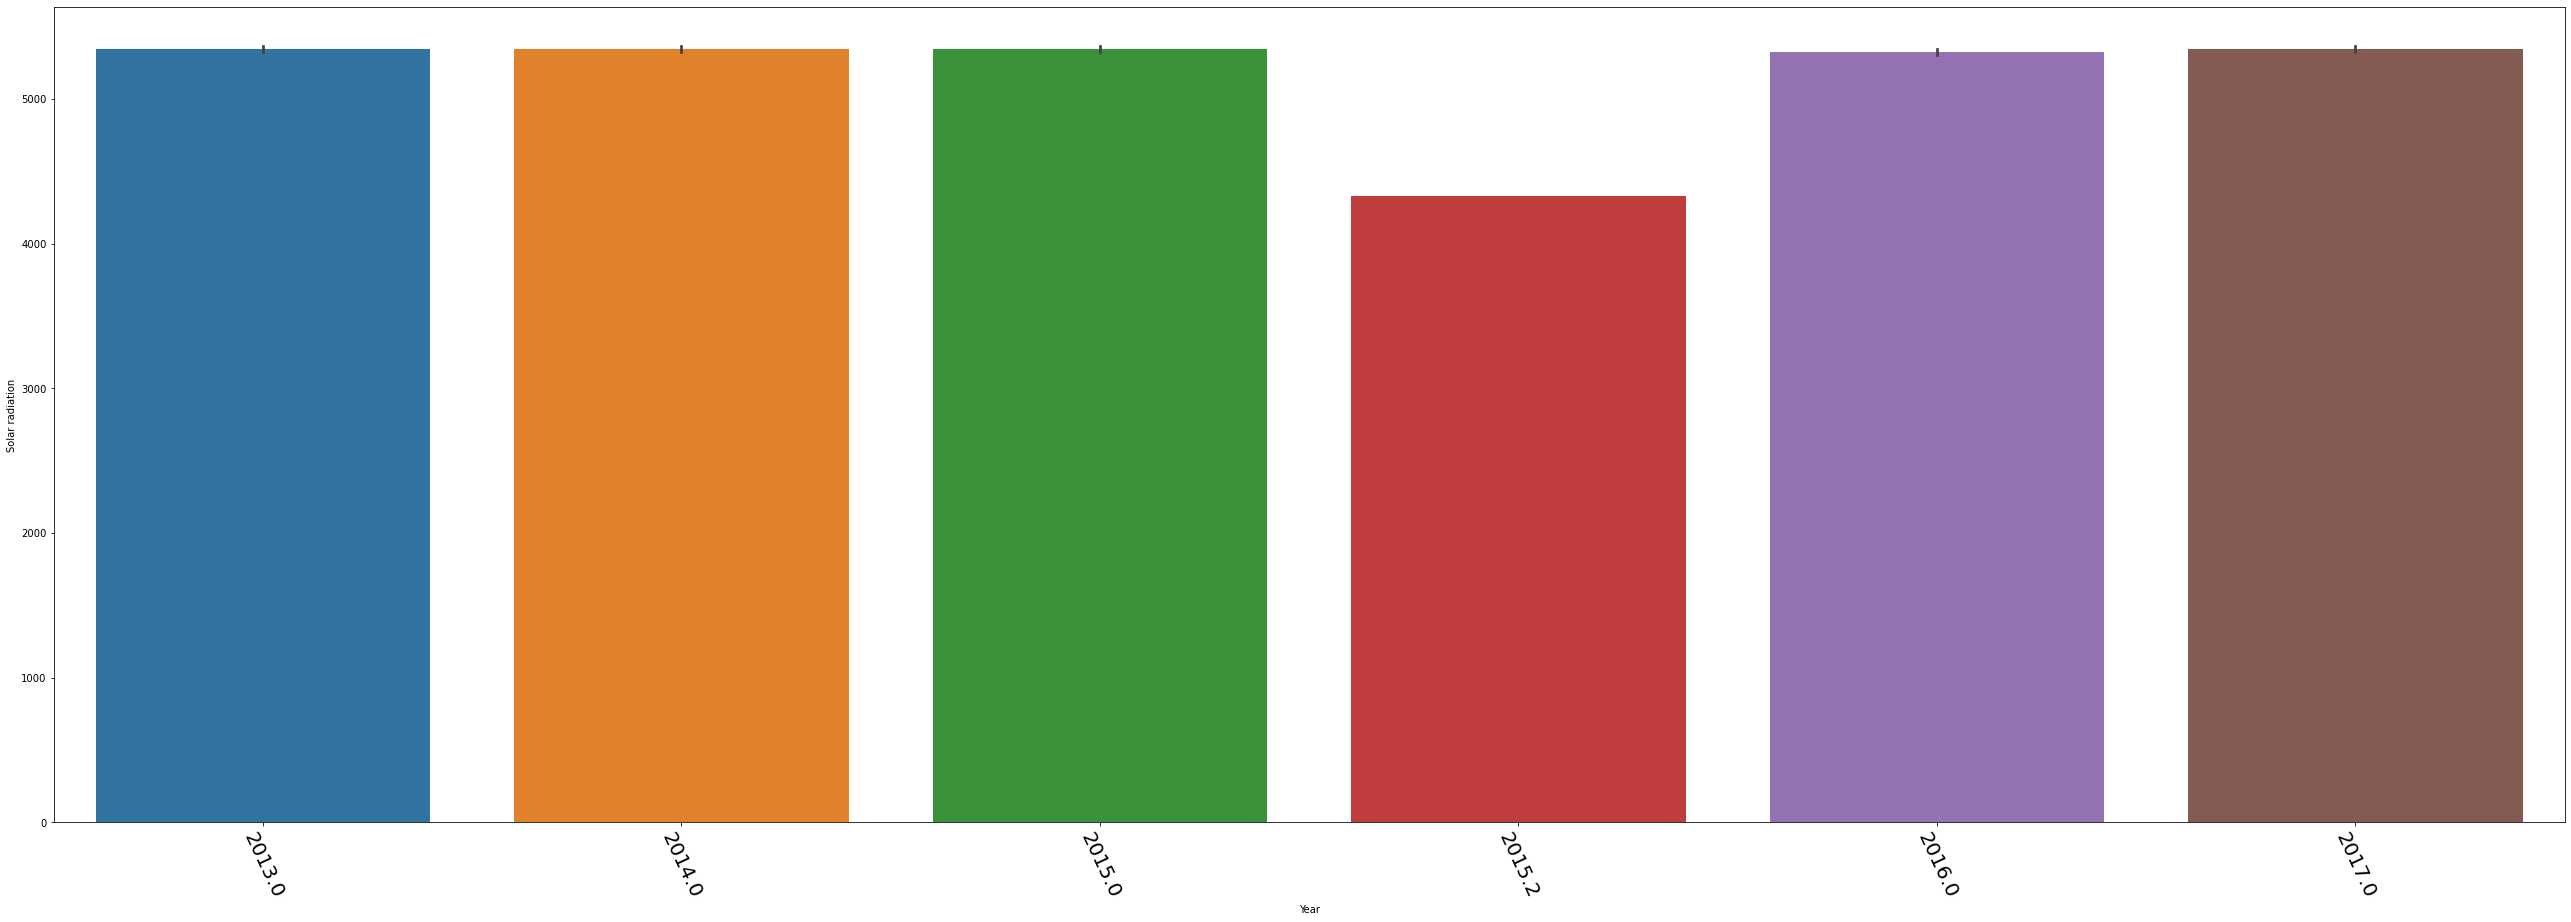

In [51]:
plt.figure(figsize = (45,15))
sb.barplot(x = 'Year', y ='Solar radiation', data = df)
plt.xticks(rotation = -65, fontsize = 20)
plt.show()

In 2015, the radiation level decreased.

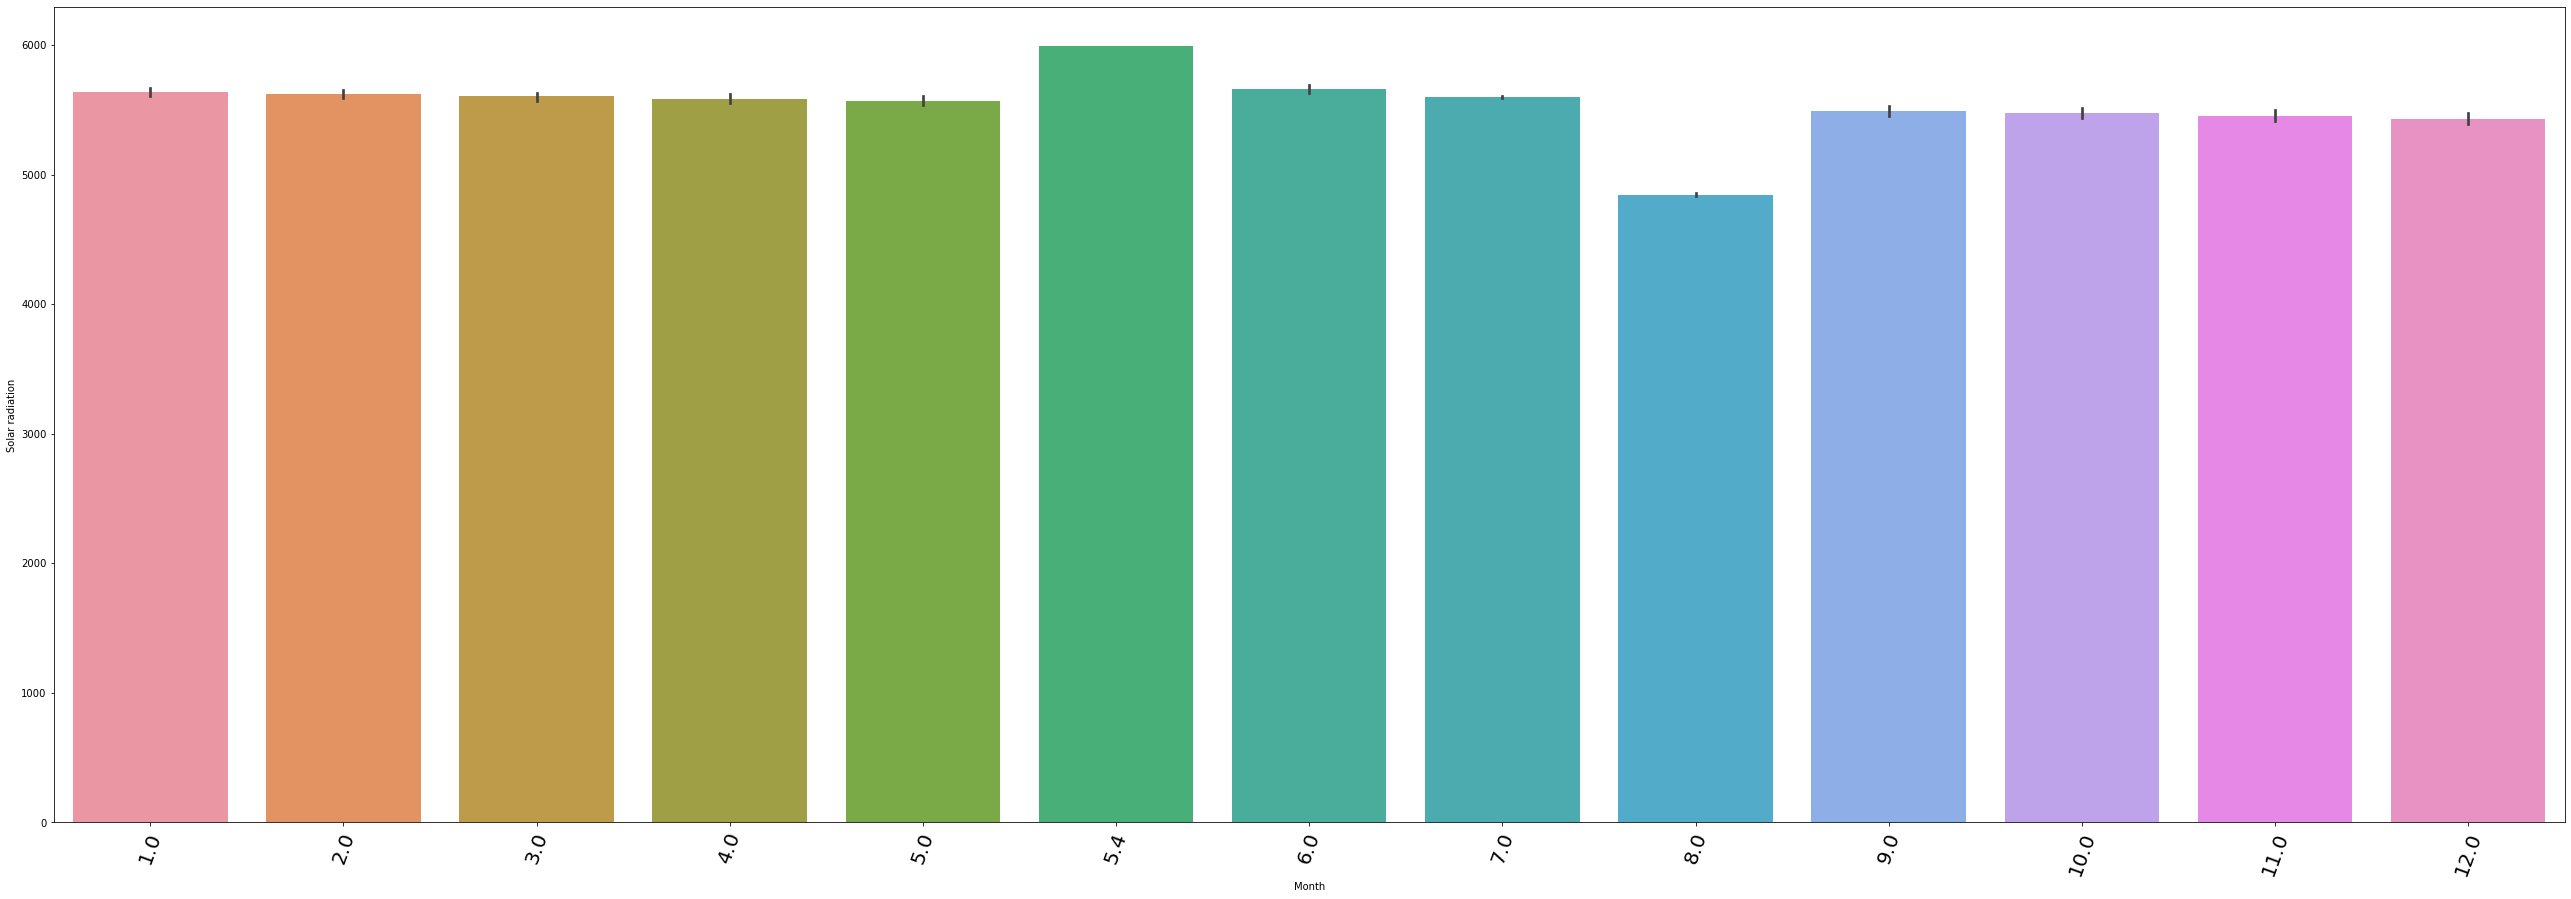

In [53]:
plt.figure(figsize = (45,15))
sb.barplot(x = 'Month', y ='Solar radiation', data = df)
plt.xticks(rotation = 70, fontsize = 20)
plt.show()

   Highest radiation is in mid may and the lowest in August

54.599834    3
19.794666    2
52.121852    2
49.382062    2
71.658089    2
            ..
53.233074    1
68.617836    1
53.693214    1
64.671288    1
56.417843    1
Name: LDAPS_RHmin, Length: 7743, dtype: int64


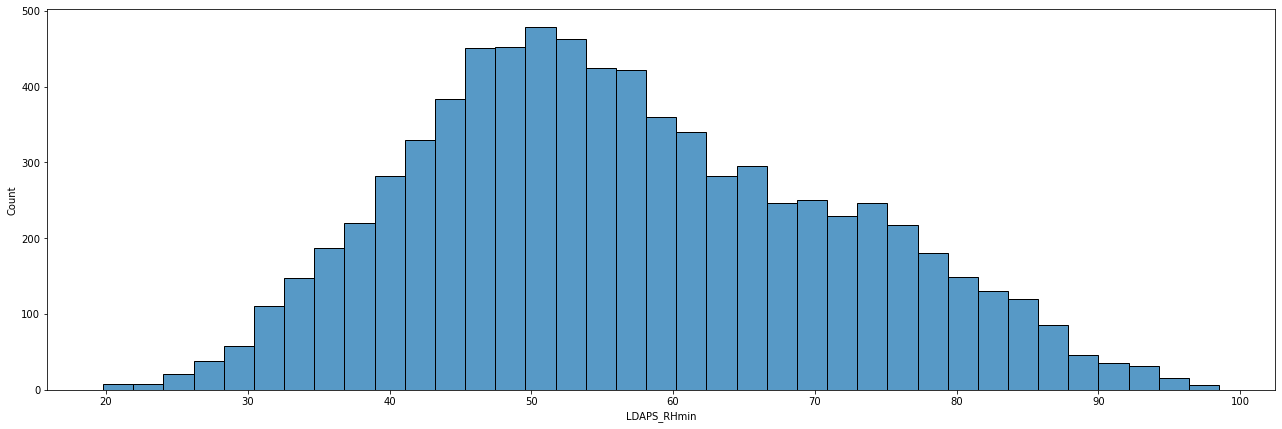

84.807553    3
94.795967    2
96.525200    2
88.324631    2
88.938194    2
            ..
84.353996    1
85.771858    1
89.319427    1
91.019920    1
92.446472    1
Name: LDAPS_RHmax, Length: 7734, dtype: int64


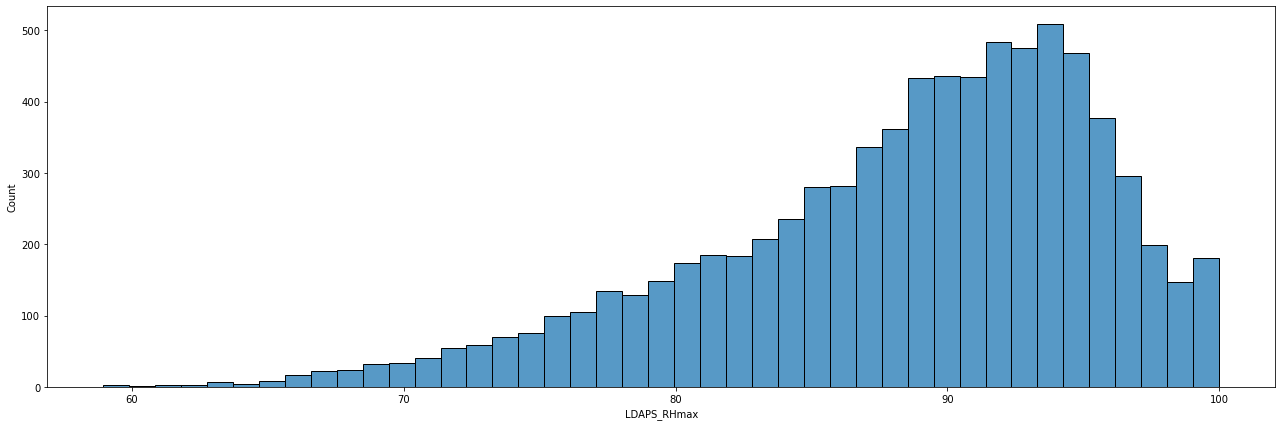

32.196252    3
32.296093    2
38.542255    2
17.624954    2
32.919993    2
            ..
31.703926    1
27.390573    1
30.491629    1
26.700805    1
29.405268    1
Name: LDAPS_Tmax_lapse, Length: 7745, dtype: int64


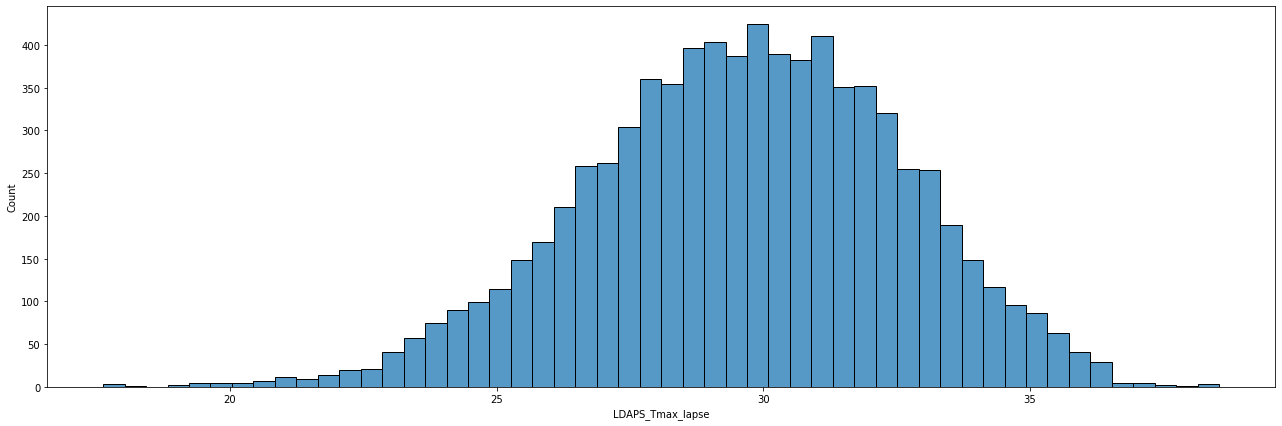

25.819196    3
29.619342    2
25.045958    2
25.815622    2
14.272646    2
            ..
23.598908    1
16.667724    1
22.482685    1
23.706379    1
22.554425    1
Name: LDAPS_Tmin_lapse, Length: 7745, dtype: int64


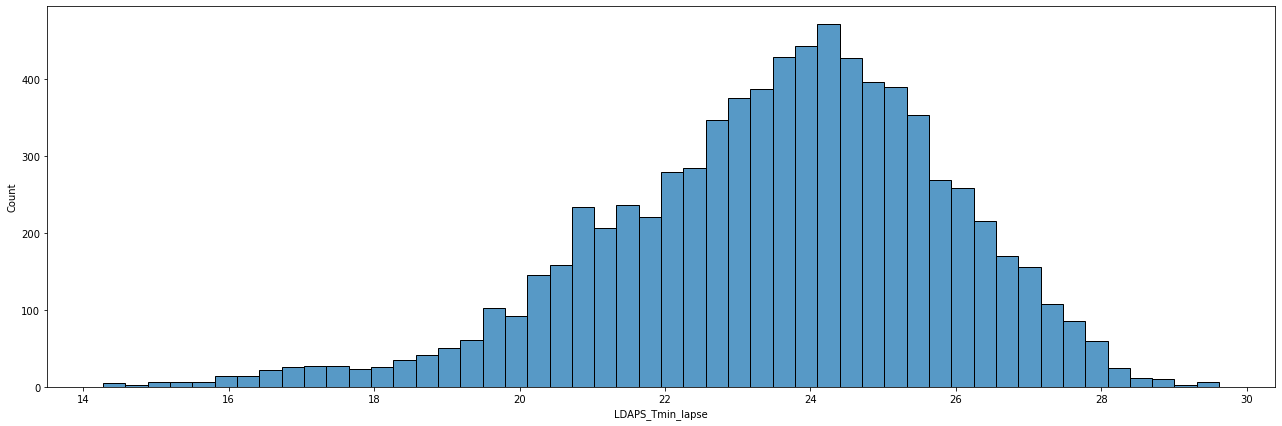

6.354137     2
2.882580     2
5.594950     2
21.857621    2
6.199460     2
            ..
6.924087     1
5.491834     1
8.241521     1
13.649393    1
5.009154     1
Name: LDAPS_WS, Length: 7746, dtype: int64


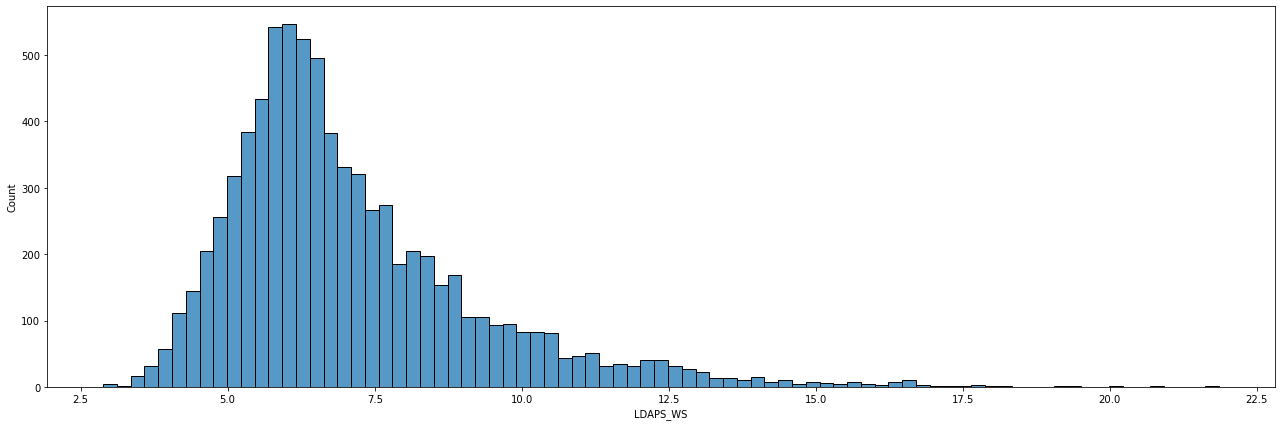

 213.414006    2
 46.405275     2
 21.046900     2
-13.603212     2
 63.934675     2
              ..
 117.837212    1
 66.655449     1
 86.062433     1
 58.363858     1
 24.522529     1
Name: LDAPS_LH, Length: 7747, dtype: int64


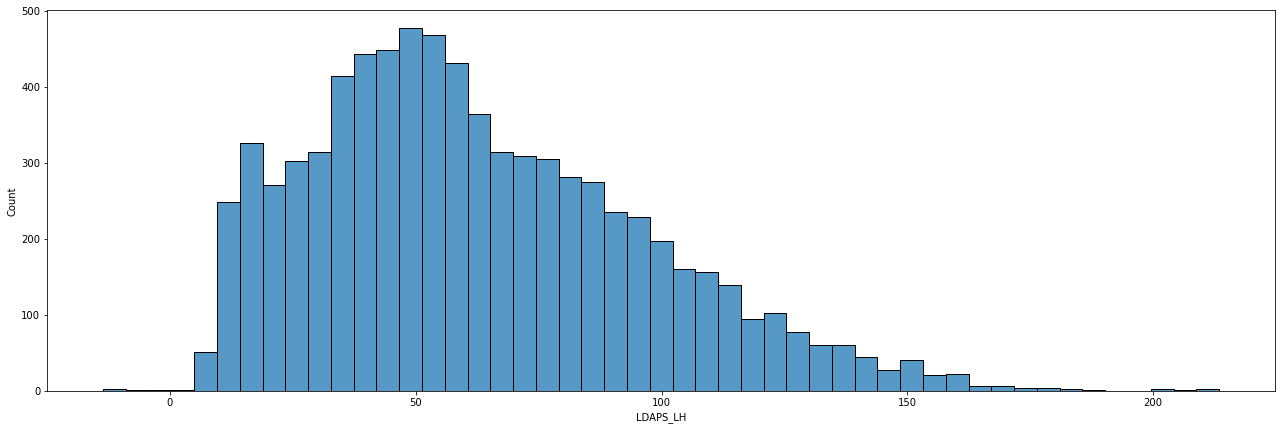

0.000000    108
0.263226      2
0.504230      2
0.967277      2
0.473578      2
           ... 
0.306375      1
0.007780      1
0.164933      1
0.378470      1
0.012819      1
Name: LDAPS_CC1, Length: 7640, dtype: int64


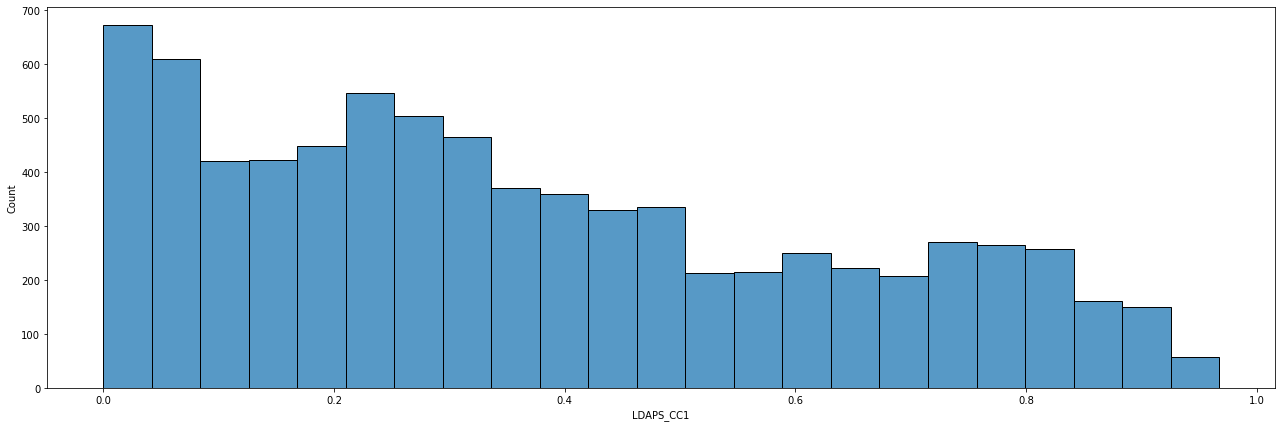

0.000000    95
0.376747     3
0.968353     2
0.383295     2
0.233050     2
            ..
0.017646     1
0.025537     1
0.278383     1
0.377259     1
0.092348     1
Name: LDAPS_CC2, Length: 7653, dtype: int64


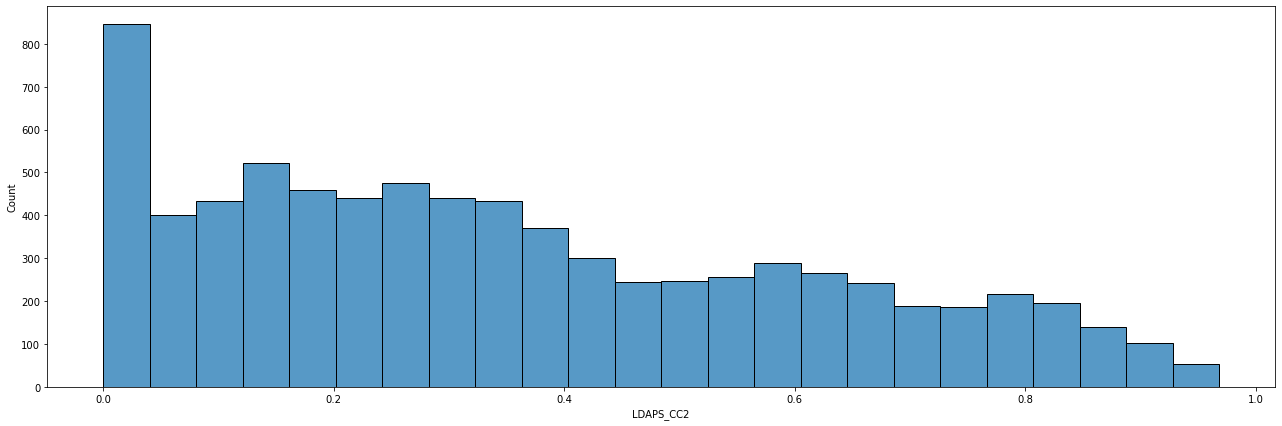

0.000000    76
0.220156     3
0.000868     2
0.235800     2
0.983789     2
            ..
0.256839     1
0.327335     1
0.705475     1
0.058720     1
0.490755     1
Name: LDAPS_CC3, Length: 7669, dtype: int64


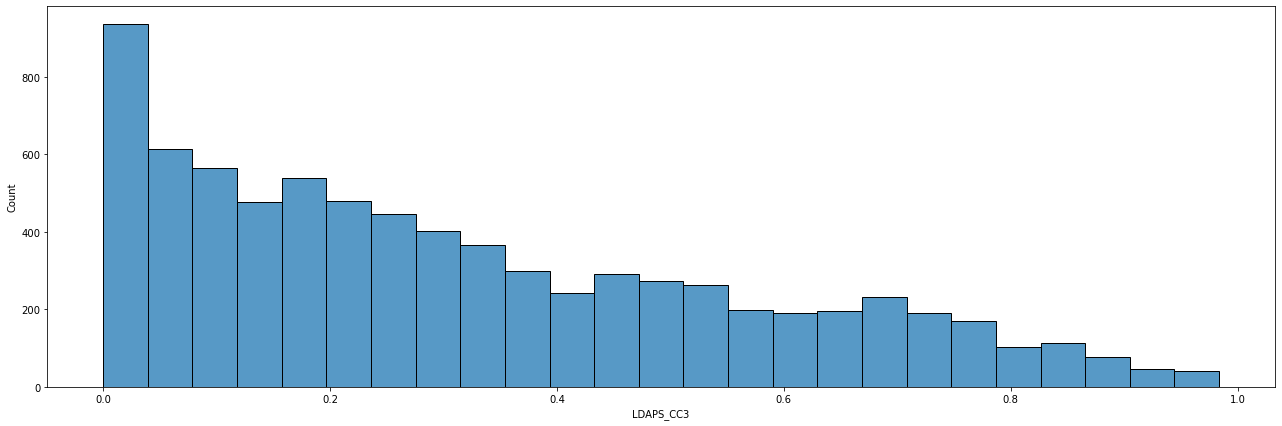

0.000000    137
0.002604      7
0.005208      3
0.001736      3
0.144145      3
           ... 
0.302367      1
0.294010      1
0.501325      1
0.119798      1
0.241679      1
Name: LDAPS_CC4, Length: 7594, dtype: int64


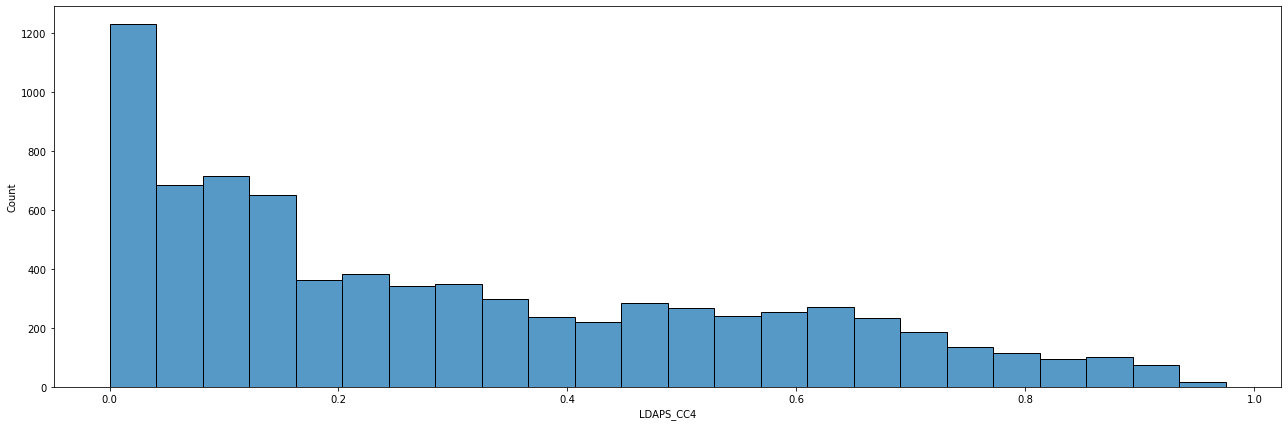

In [55]:
col = ['LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 
   'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4']
for i in col: 
    plt.figure(figsize = (22,7))
    ax = sns.histplot(x = i, data = df)
    print(df[i].value_counts())
    plt.show()

  
    LDAPS_RHmin	-  Norman distribution. 
    
    LDAPS_RHmax	 - Right Skewed, will normalise later. 
   
    LDAPS_Tmax_lapse - Normal distribution, chances of high temp, the next day.
    
    LDAPS_Tmin_lapse - Normally distributed though considering a fact that there are putliers present in the data.
    
    LDAPS_WS - Skewed, need to normalise later. Chances of high wind speed next day.
    
    LDAPS_LH - There are few outliers present in the data which has to be checked.	
    
    Next day day forecasts with a 6 hour split. 
    
    LDAPS_CC1 - Normalised graph.
    
    LDAPS_CC2 - Outliers present. 	
    
    LDAPS_CC3 - Outliers present.
    
    LDAPS_CC4 - Outliers present. 	
    

In [56]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.00000
mean,12.998865,29.769249,23.226713,56.712966,88.369128,29.633310,23.526105,7.089773,62.527477,0.368300,0.355391,0.317208,0.298383,0.588571,0.481462,0.276908,0.266969,37.544722,126.991397,61.867972,1.257048,5341.502803,30.275544,22.934450,2015.000155,7.080547,16.37211
std,7.212017,2.963391,2.408518,14.620018,7.168515,2.941858,2.339946,2.176008,33.645225,0.261542,0.257110,0.249503,0.253477,1.937142,1.754790,1.156669,1.200630,0.050352,0.079435,54.279780,1.370444,429.158867,3.125852,2.485431,1.414170,2.238181,8.24190
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.00000
25%,7.000000,27.800000,21.700000,45.973853,84.246307,27.693091,22.114651,5.680214,37.412333,0.148273,0.142199,0.103060,0.082665,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.380000,2014.000000,7.000000,8.00000
50%,13.000000,29.900000,23.400000,54.959623,89.750568,29.744207,23.771672,6.540041,56.953214,0.314835,0.311353,0.259830,0.226880,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.00000
75%,19.000000,32.000000,24.900000,67.078279,93.711344,31.734400,25.162746,8.009219,84.192035,0.571811,0.554963,0.494007,0.497230,0.054383,0.020037,0.008591,0.000133,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.00000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.00000


Based on the data details that we got above, we are able to see many outliers present in many of these data and also we are able to see a significant differencce in the 75% and the maximum of most of the data in the describe.

Also the standard deviation looks a bit messy, will have to clear those before we move ahead with the data.

Checking for outliers. 

Let us get the details of continuous variables so that categorical do not get mixed up.

In [57]:
cols = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 
 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 
 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Solar radiation', 
 'Next_Tmax', 'Next_Tmin']

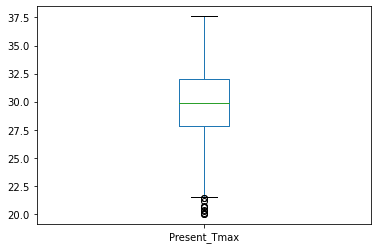

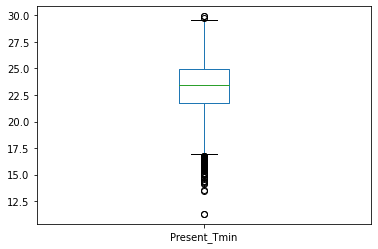

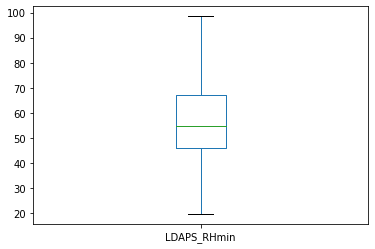

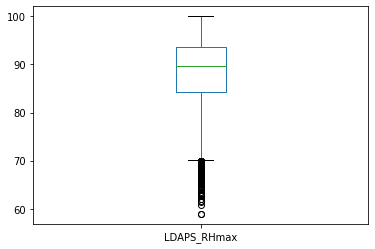

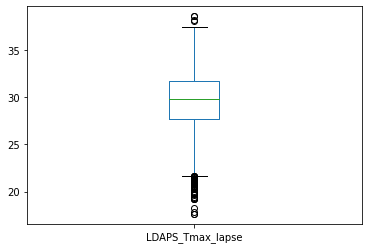

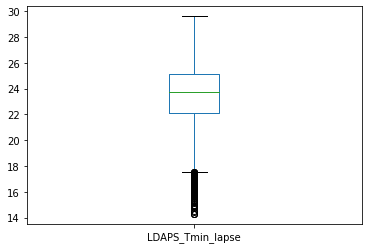

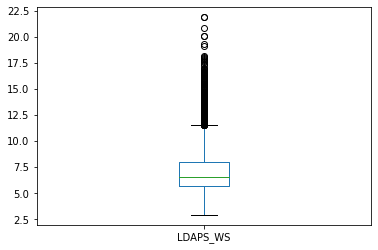

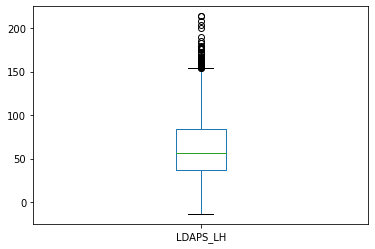

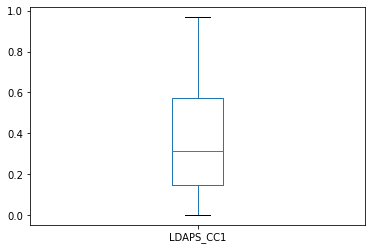

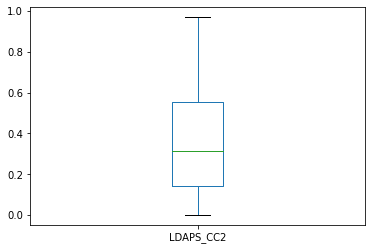

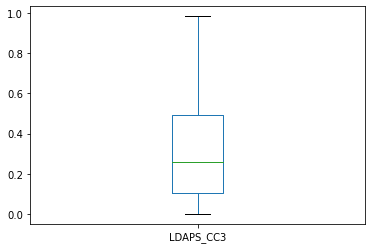

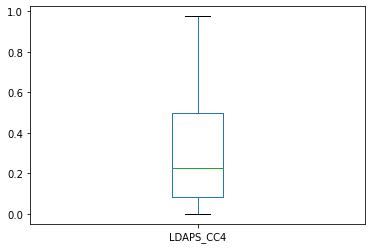

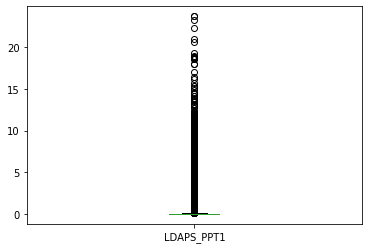

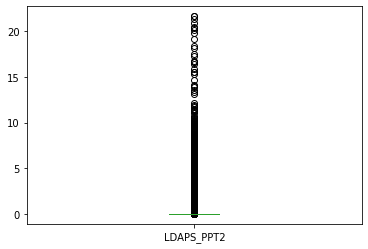

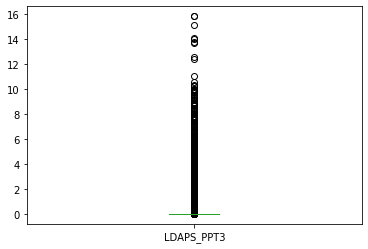

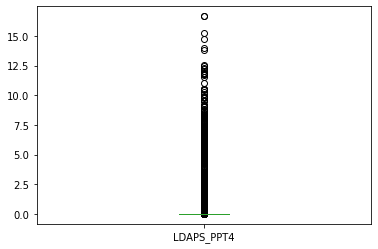

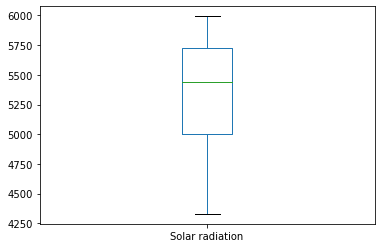

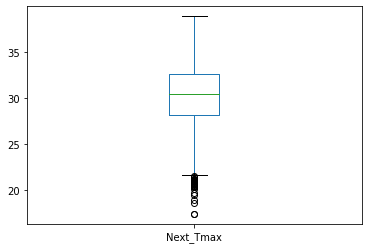

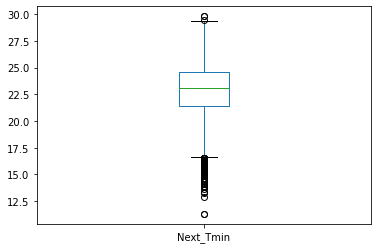

In [59]:
for i in cols:
    df[i].plot.box()
    plt.show()

Observation: 
    
    Outliers are there in 
    Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,Next_Tmax,Next_Tmin.

In [60]:
from scipy.stats import zscore

In [61]:
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))

In [62]:
df_new = df[(z<3).all(axis = 1)]
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,2017.0,8.0,30.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,2017.0,8.0,30.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,2017.0,8.0,30.0


In [63]:
df_new.shape

(6897, 27)

In [64]:
df.shape

(7752, 27)

In [65]:
#Finding the percentage of dataloss

loss = ((7752-6897)/7752)*100
loss

11.029411764705882

We cannot afford to loose more than 10% of the day and hence we will try using IQR.

Just because we are not sure on the prediction value let us try to create 2 models and check if we can get something out of it.

In [66]:
df_no_out = df_new

In [67]:
df_no_out.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [68]:
df_no_out.shape

(6897, 27)

### Checking for skewness

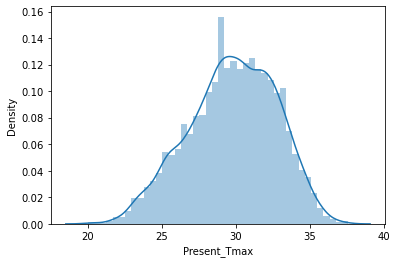

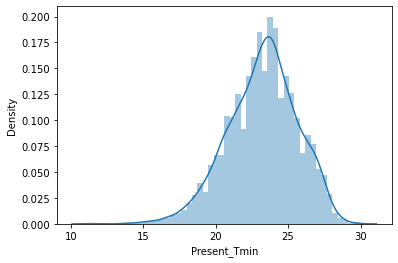

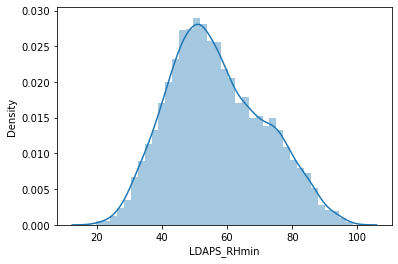

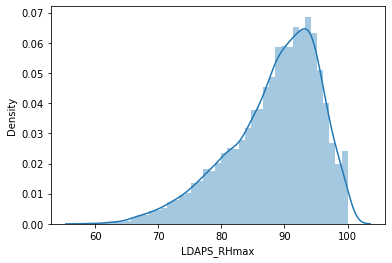

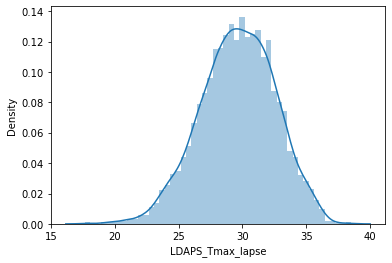

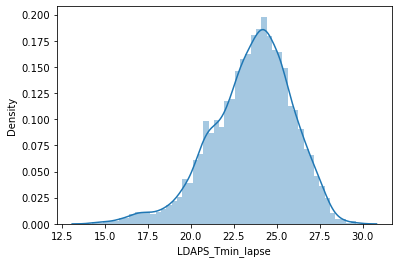

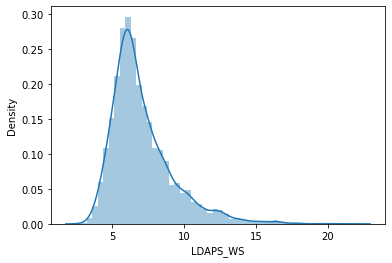

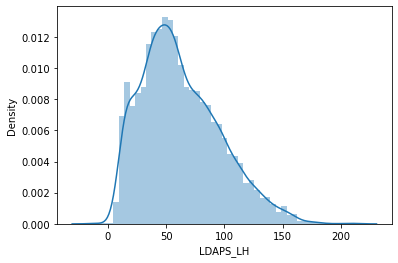

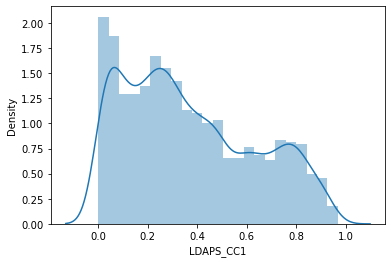

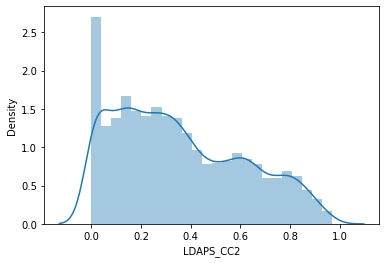

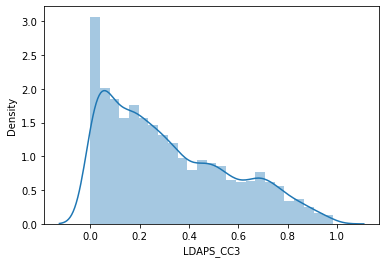

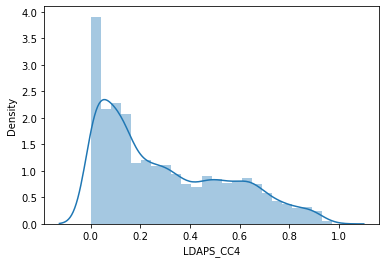

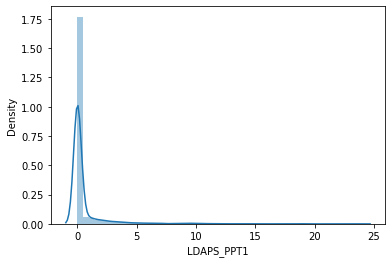

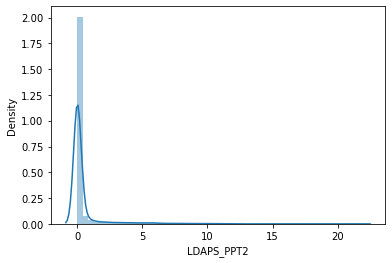

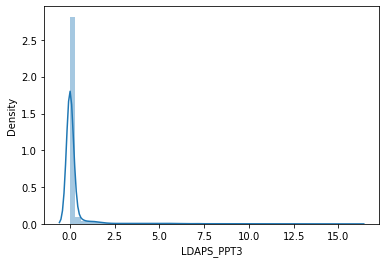

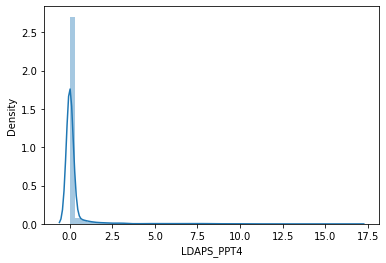

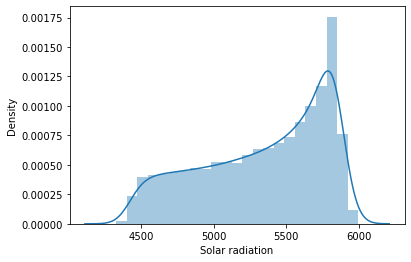

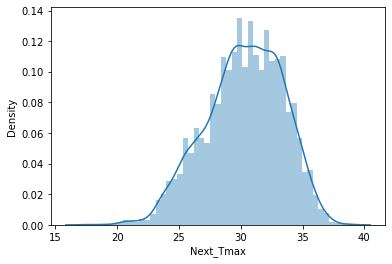

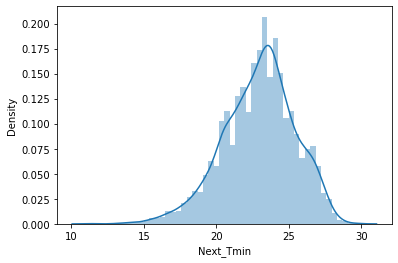

In [70]:
for i in cols: 
    sb.distplot(df[i], kde = True)
    plt.show()

In [71]:
df.skew()

station            -0.000111
Present_Tmax       -0.263172
Present_Tmin       -0.366972
LDAPS_RHmin         0.306680
LDAPS_RHmax        -0.849100
LDAPS_Tmax_lapse   -0.240289
LDAPS_Tmin_lapse   -0.590007
LDAPS_WS            1.583093
LDAPS_LH            0.668231
LDAPS_CC1           0.462245
LDAPS_CC2           0.477772
LDAPS_CC3           0.650527
LDAPS_CC4           0.671576
LDAPS_PPT1          5.392290
LDAPS_PPT2          5.776056
LDAPS_PPT3          6.452470
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339739
Next_Tmin          -0.406029
Year               -0.000282
Month              -0.705146
Day                 0.245510
dtype: float64

We see a significant skewness here in the data.

Splitting.

In [72]:
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis = 1)
y = df[['Next_Tmax', 'Next_Tmin']]

In [73]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013.0,6.0,30.0


In [74]:
y.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


For another model as well, lets take it parallely.

In [76]:

x_wo = df_no_out.drop(['Next_Tmax', 'Next_Tmin'], axis = 1)
y_wo = df_no_out[['Next_Tmax', 'Next_Tmin']]

In [77]:
x_wo.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013.0,6.0,30.0


In [78]:
y_wo.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


Skewness

In [79]:
from sklearn.preprocessing import PowerTransformer

In [80]:
#Removing the skewness in the x variable (with outliers)
pt = PowerTransformer(method='yeo-johnson')

In [81]:
x = pt.fit_transform(x)
x_wo = pt.fit_transform(x_wo)

In [82]:
x_cols = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Year', 'Month', 'Day']

In [83]:
x = pd.DataFrame(x, columns = x_cols)
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,-1.859780,-0.408480,-0.796919,0.177609,0.273125,-0.563788,-0.319975,0.100425,0.309679,-0.407959,-0.501250,-0.533096,-0.578249,-0.561657,-0.523568,-0.496929,-0.446026,0.0,-0.027632,1.834978,1.314153,1.849430,-1.414465,-0.582312,1.418607
1,-1.647833,0.702900,-0.719541,-0.236202,0.186248,0.034292,0.135699,-0.618907,-0.211122,-0.447062,-0.278163,-0.545589,-0.597103,-0.561657,-0.523568,-0.496929,-0.446026,0.0,0.497283,0.055979,-0.385336,1.400702,-1.414465,-0.582312,1.418607
2,-1.454324,0.593734,-0.028752,-0.495825,-0.771297,0.117560,0.385617,-0.307808,-1.372196,-0.523240,-0.252570,-0.307932,-0.513363,-0.561657,-0.523568,-0.496929,-0.446026,0.0,0.836548,-0.364575,-0.949164,1.380650,-1.414465,-0.582312,1.418607
3,-1.273463,0.739518,0.013736,0.176543,1.314025,-0.015993,-0.182444,-0.650135,0.203745,-0.489908,-0.396409,-0.536083,-0.558835,-0.561657,-0.523568,-0.496929,-0.446026,0.0,0.368125,0.084879,1.235263,1.357783,-1.414465,-0.582312,1.418607
4,-1.102081,0.521529,-0.601943,0.036714,0.111557,-0.217322,-0.112047,-0.587120,1.297106,-0.810987,-0.286181,-0.439534,-0.358611,-0.561657,-0.523568,-0.496929,-0.446026,0.0,1.871193,-0.290442,-0.401730,1.366748,-1.414465,-0.582312,1.418607


In [84]:
x_wo = pd.DataFrame(x_wo, columns = x_cols)
x_wo.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,-1.871161,-0.480902,-0.847404,0.261086,0.348095,-0.682225,-0.367215,0.179043,0.347609,-0.310397,-0.428899,-0.461095,-0.514173,-0.528452,-0.488876,-0.466139,-0.41484,0.0,-0.019997,1.854411,1.329637,1.889291,0.0,-0.583813,1.419717
1,-1.658603,0.665534,-0.765729,-0.171062,0.260555,-0.042357,0.100776,-0.576227,-0.170916,-0.351767,-0.194548,-0.474431,-0.534442,-0.528452,-0.488876,-0.466139,-0.41484,0.0,0.503362,0.069695,-0.374203,1.434084,0.0,-0.583813,1.419717
2,-1.464532,0.552522,-0.046632,-0.441918,-0.723156,0.045724,0.354257,-0.251849,-1.385413,-0.432632,-0.167720,-0.221611,-0.444535,-0.528452,-0.488876,-0.466139,-0.41484,0.0,0.841623,-0.353347,-0.943116,1.413731,0.0,-0.583813,1.419717
3,-1.283141,0.703460,-0.002953,0.259973,1.379796,-0.095662,-0.225128,-0.608608,0.243178,-0.397205,-0.318653,-0.464282,-0.493318,-0.528452,-0.488876,-0.466139,-0.41484,0.0,0.374587,0.098752,1.251068,1.390520,0.0,-0.583813,1.419717
4,-1.111255,0.477819,-0.642058,0.113889,0.185092,-0.309970,-0.152687,-0.543234,1.299432,-0.741269,-0.202954,-0.361381,-0.279203,-0.528452,-0.488876,-0.466139,-0.41484,0.0,1.873207,-0.278748,-0.390725,1.399621,0.0,-0.583813,1.419717


In [85]:
x.skew()

station            -0.204710
Present_Tmax       -0.036078
Present_Tmin       -0.013699
LDAPS_RHmin        -0.017200
LDAPS_RHmax        -0.116473
LDAPS_Tmax_lapse   -0.011809
LDAPS_Tmin_lapse   -0.021195
LDAPS_WS            0.003522
LDAPS_LH            0.055268
LDAPS_CC1           0.048560
LDAPS_CC2           0.047504
LDAPS_CC3           0.092295
LDAPS_CC4           0.131077
LDAPS_PPT1          1.446305
LDAPS_PPT2          1.628709
LDAPS_PPT3          1.804874
LDAPS_PPT4          2.052019
lat                 0.000000
lon                -0.198429
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Year               -0.000298
Month               0.043745
Day                -0.041816
dtype: float64

Scaling

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
ss = StandardScaler()

In [88]:
x = ss.fit_transform(x)
x_wo = ss.fit_transform(x_wo)

In [89]:
x = pd.DataFrame(x, columns = x_cols)
x_wo = pd.DataFrame(x_wo, columns = x_cols)

Modelling

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [91]:
#SupportVectorMachine (SVM) will not work with Multioutput regression

In [92]:
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 77)

Not using for loop for test and random state as we usually work on getting the best random state and use that for other models as well, however there is a possibility the the random value chanage with the model we use to get the best random state or test size hence not using that and assuming mostly used 30 7- split for test and a random value for random state as I presume that it might not bring a big difference in the data.

In [94]:
x_train.shape

(5426, 25)

In [95]:
x_test.shape

(2326, 25)

In [96]:
y_train.shape

(5426, 2)

In [97]:
y_test.shape

(2326, 2)

In [98]:
model = [lr, knr, dtr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred_test = m.predict(x_test)
    pred_train = m.predict(x_train)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred_test))
    print('Mean squared error: ', mean_squared_error(y_test,pred_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test)))
    print('R2 Score: ', r2_score(y_test,pred_test))
    print('\n\n')

LinearRegression()
Score:  0.804953426153385
Mean absolute error:  0.9774940021089923
Mean squared error:  1.6713985547348886
Root mean squared error:  1.2928258021616403
R2 Score:  0.7964615915562457



KNeighborsRegressor()
Score:  0.9206544632948854
Mean absolute error:  0.7107790197764381
Mean squared error:  0.8903429337919185
Root mean squared error:  0.9435798502468769
R2 Score:  0.8853449955537059



DecisionTreeRegressor()
Score:  1.0
Mean absolute error:  1.003142734307822
Mean squared error:  2.0087895958727433
Root mean squared error:  1.4173177469688099
R2 Score:  0.7509665795286418



RandomForestRegressor()
Score:  0.9855769655583977
Mean absolute error:  0.6689201633705937
Mean squared error:  0.8117426902235599
Root mean squared error:  0.9009676410524187
R2 Score:  0.898055735139629



Lasso()
Score:  0.6074422075947354
Mean absolute error:  1.393719956731326
Mean squared error:  3.152672818751247
Root mean squared error:  1.7755767566487366
R2 Score:  0.6064211446588

### Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr, knr, dtr, rfr, ls, rd, eln]
for m in model:
    print('The model is: \n',m)
    for j in range (2,10):
        test_accuracy = r2_score(y_test, pred_test)
        cv_score = cross_val_score(m, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

The model is: 
 LinearRegression()
At cross fold 2 the cv score is 0.6888280940129856



At cross fold 3 the cv score is 0.7262411253699811



At cross fold 4 the cv score is 0.7339750301747404



At cross fold 5 the cv score is 0.7236949963414485



At cross fold 6 the cv score is 0.7187395108119824



At cross fold 7 the cv score is 0.7251912866141518



At cross fold 8 the cv score is 0.7242262725331922



At cross fold 9 the cv score is 0.6577364158697394



The model is: 
 KNeighborsRegressor()
At cross fold 2 the cv score is 0.4811905819289616



At cross fold 3 the cv score is 0.5361806813759792



At cross fold 4 the cv score is 0.5176518105221564



At cross fold 5 the cv score is 0.5200242537734677



At cross fold 6 the cv score is 0.5200767927219441



At cross fold 7 the cv score is 0.517307700557628



At cross fold 8 the cv score is 0.5071578384155362



At cross fold 9 the cv score is 0.37860073423443047



The model is: 
 DecisionTreeRegressor()
At cross fold 2 the cv 

Here we see that the best model is Rndom forest considering that the difference is not much and the accuracy is close to 89.

In [103]:
rfr.fit(x_train, y_train)
a = rfr.score(x_train, y_train)
pred_train = rfr.predict(x_train)
pred_test_rfr =rfr.predict(x_test)


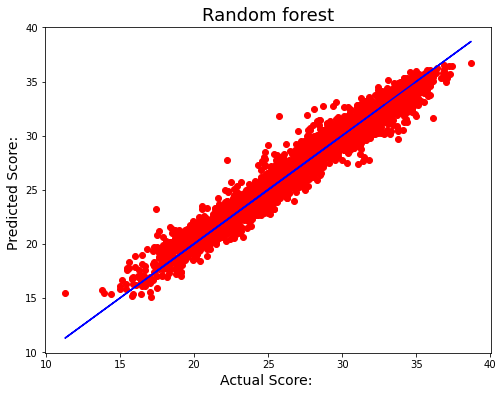

In [104]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_test_rfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Score: ', fontsize = 14)
plt.ylabel('Predicted Score: ', fontsize = 14)
plt.title('Random forest', fontsize = 18)
plt.show()

Grid search

In [105]:
from sklearn.model_selection import GridSearchCV

param = {'criterion':['mse','mae'],'max_features':['log2','auto','sqrt'], 'n_estimators' : [10,20,30],'min_samples_split' : [2,4,8]}

modelrfr = RandomForestRegressor()

grids = GridSearchCV(modelrfr,param,cv=4)


grid_result = grids.fit(x_train, y_train)


print(grids.best_params_)

print('Best Score: ', grid_result.best_score_)

{'criterion': 'mse', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 30}
Best Score:  0.8944970554839635


In [107]:
rfr=RandomForestRegressor(n_estimators=30,criterion='mse',max_features='sqrt',min_samples_split=2)

In [109]:
rfr.fit(x_train, y_train)
rfr.score(x_train, y_train)
predrfr = rfr.predict(x_test)

In [110]:
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(y_test,predrfr))
print('Mean squared error: ', mean_squared_error(y_test,predrfr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,predrfr)))
print('\n')
print('R2 Score: ', r2_score(y_test,predrfr))

Errors:


Mean absolute error:  0.6496155058756085
Mean squared error:  0.7416805039648411
Root mean squared error:  0.8612087458710815


R2 Score:  0.9064919581769394


Saving Model

In [125]:
joblib.dump(rfr, 'temprfr1.obj')

['temprfr1.obj']

Chekcing model for the data without outlier.

In [111]:
xwo_train, xwo_test, ywo_train, ywo_test = train_test_split(x_wo, y_wo, test_size = 0.3, random_state = 77)



Not using for loop for test and random state as we usually work on getting the best random state and use that for other models as well, however there is a possibility the the random value chanage with the model we use to get the best random state or test size hence not using that and assuming mostly used 30 7- split for test and a random value for random state as I presume that it might not bring a big difference in the data.

As all instances are created above, let us train the model

In [112]:
model = [lr, knr, dtr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(xwo_train, ywo_train)
    a = m.score(xwo_train, ywo_train)
    pred_train=m.predict(xwo_train)
    pred = m.predict(xwo_test)
    print('Score: ', a)
    print('Accuracy score for the training : ',r2_score(ywo_train,pred_train))
    print('Mean absolute error: ', mean_absolute_error(ywo_test,pred))
    print('Mean squared error: ', mean_squared_error(ywo_test,pred))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(ywo_test,pred)))
    print('R2 Score: ', r2_score(ywo_test,pred))
    print('\n\n')

LinearRegression()
Score:  0.7910792045136323
Accuracy score for the training :  0.7910792045136323
Mean absolute error:  0.9400993868413642
Mean squared error:  1.5470509740449847
Root mean squared error:  1.2438050385992914
R2 Score:  0.7874499621393332



KNeighborsRegressor()
Score:  0.9083566134037866
Accuracy score for the training :  0.9083566134037866
Mean absolute error:  0.7471014492753616
Mean squared error:  0.9706531323671492
Root mean squared error:  0.9852173021050479
R2 Score:  0.8614342125664523



DecisionTreeRegressor()
Score:  1.0
Accuracy score for the training :  1.0
Mean absolute error:  0.9984154589371967
Mean squared error:  1.92029661835749
Root mean squared error:  1.3857476748519155
R2 Score:  0.7309315223697104



RandomForestRegressor(max_features='sqrt', n_estimators=30)
Score:  0.9821344942437864
Accuracy score for the training :  0.9821344942437864
Mean absolute error:  0.6608542673107877
Mean squared error:  0.7675113894793333
Root mean squared error: 

In [113]:
model = [lr, knr, dtr, rfr, ls, rd, eln]
for m in model:
    print('The model is: \n',m)
    for j in range (2,10):
        test_accuracy = r2_score(ywo_test, pred)
        cv_score = cross_val_score(m, x_wo, y_wo, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

The model is: 
 LinearRegression()
At cross fold 2 the cv score is 0.7342075828789496



At cross fold 3 the cv score is 0.7382567010276085



At cross fold 4 the cv score is 0.7348493124279579



At cross fold 5 the cv score is 0.7253968853603766



At cross fold 6 the cv score is 0.713674330376671



At cross fold 7 the cv score is 0.718142452407554



At cross fold 8 the cv score is 0.7222244266087383



At cross fold 9 the cv score is 0.6607328142101144



The model is: 
 KNeighborsRegressor()
At cross fold 2 the cv score is 0.4952597504726919



At cross fold 3 the cv score is 0.5271213460279305



At cross fold 4 the cv score is 0.5418567320081704



At cross fold 5 the cv score is 0.5351928224353438



At cross fold 6 the cv score is 0.5271462431935005



At cross fold 7 the cv score is 0.5293721549606667



At cross fold 8 the cv score is 0.5332753769784059



At cross fold 9 the cv score is 0.4311481882666113



The model is: 
 DecisionTreeRegressor()
At cross fold 2 the cv sc

We see here that the least difference is for Random forest here as well and hence we will finalise the model for final prediction.

In [120]:
rfr.fit(xwo_train, ywo_train)
a = rfr.score(xwo_train, ywo_train)
pred_train = rfr.predict(xwo_train)
pred_test_rfr =rfr.predict(xwo_test)


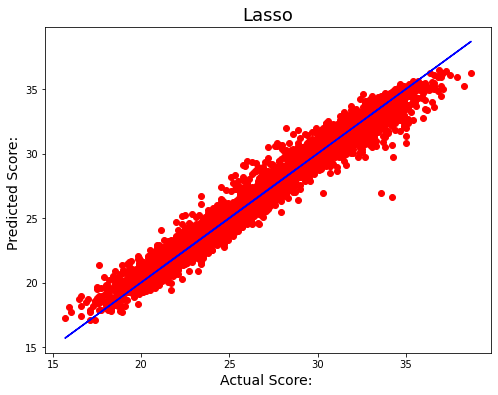

In [121]:
plt.figure(figsize = (8,6))
plt.scatter(x = ywo_test, y = pred_test_rfr, color = 'r')
plt.plot(ywo_test, ywo_test, color = 'b')
plt.xlabel('Actual Score: ', fontsize = 14)
plt.ylabel('Predicted Score: ', fontsize = 14)
plt.title('Lasso', fontsize = 18)
plt.show()

Grid Search:

In [126]:
from sklearn.model_selection import GridSearchCV

param = {'criterion':['mse','mae'],'max_features':['log2','auto','sqrt'], 'n_estimators' : [10,20,30]}

modelrfr = RandomForestRegressor()

grids = GridSearchCV(modelrfr,param)


grid_result = grids.fit(x_train, y_train)


print(grids.best_params_)

print('Best Score: ', grid_result.best_score_)

{'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 30}
Best Score:  0.8963208818331101


In [127]:
rfr=RandomForestRegressor(n_estimators=30,criterion='mse',max_features='log2')

In [129]:
rfr.fit(xwo_train, ywo_train)
rfr.score(xwo_train, ywo_train)
predrfr = rfr.predict(xwo_test)
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(ywo_test,predrfr))
print('Mean squared error: ', mean_squared_error(ywo_test,predrfr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(ywo_test,predrfr)))
print('\n')
print('R2 Score: ', r2_score(ywo_test,predrfr))

Errors:


Mean absolute error:  0.683684057971014
Mean squared error:  0.8213664122383242
Root mean squared error:  0.9062926747129341


R2 Score:  0.8848091242104283


We have 88 percent which is quite good enough hence we will keep this as well.


In [130]:
joblib.dump(rfr, 'temp2rfr.obj')

['temp2rfr.obj']

# ...................................x.............................................